In [ ]:
import pandas as pd  #for data manipulation
import numpy as np   #for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt  #for plotting

data = pd.read_csv('/content/RTA Dataset.csv')

In [5]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:

data[column] = pd.to_numeric(data[column], errors='coerce')
median_value = data[column].median()
data[column].fillna(median_value, inplace=True)


print(data.info())
print(data.head())

<ipython-input-7-365b0774ac3a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [9]:
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing Percentage (%)': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

                         Missing Values  Missing Percentage (%)
Defect_of_vehicle                  4427               35.945112
Service_year_of_vehicle            3928               31.893472
Work_of_casuality                  3198               25.966223
Fitness_of_casuality               2635               21.394933
Type_of_vehicle                     950                7.713543
Types_of_Junction                   887                7.202014
Driving_experience                  829                6.731082
Educational_level                   741                6.016564
Vehicle_driver_relation             579                4.701202
Owner_of_vehicle                    482                3.913608
Lanes_or_Medians                    385                3.126015
Vehicle_movement                    308                2.500812
Area_accident_occured               239                1.940565
Road_surface_type                   172                1.396557
Type_of_collision                   155 

In [10]:
data = data.drop(columns=['Defect_of_vehicle','Fitness_of_casuality','Work_of_casuality', 'Service_year_of_vehicle','Casualty_severity'], axis=1)

In [11]:
value_to_search = "na"
value_counts = (data == value_to_search).sum()
print("Occurrences of value 'na' per column:")
print(value_counts)

Occurrences of value 'na' per column:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4687
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity         

In [12]:
columns_to_display = ["Casualty_class", "Sex_of_casualty",
                      "Age_band_of_casualty"]

print(data[columns_to_display])

        Casualty_class Sex_of_casualty Age_band_of_casualty
0                   na              na                   na
1                   na              na                   na
2      Driver or rider            Male                31-50
3           Pedestrian          Female                18-30
4                   na              na                   na
...                ...             ...                  ...
12311               na              na                   na
12312               na              na                   na
12313  Driver or rider            Male                31-50
12314               na              na                   na
12315       Pedestrian          Female                   na

[12316 rows x 3 columns]


In [13]:
value_to_search = "Unknown"
value_counts = (data == value_to_search).sum()
print("Occurrences of value 'Unknown' per column:")
print(value_counts)

Occurrences of value 'Unknown' per column:
Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               100
Vehicle_driver_relation          14
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Area_accident_occured            22
Lanes_or_Medians                 57
Road_allignment                   0
Types_of_Junction               191
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision                14
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                 88
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Pedestrian_movement               0
Cause_of_accident                25
Accident_severity    

In [14]:
columns_to_replace = ["Casualty_class", "Sex_of_casualty",
                      "Age_band_of_casualty"]

for column in columns_to_replace:
    mode_value = data.loc[data[column] != "na", column].mode()[0]
    data[column] = data[column].replace("na", mode_value)
print(data[columns_to_replace].head())

    Casualty_class Sex_of_casualty Age_band_of_casualty
0  Driver or rider            Male                18-30
1  Driver or rider            Male                18-30
2  Driver or rider            Male                31-50
3       Pedestrian          Female                18-30
4  Driver or rider            Male                18-30


In [15]:
for column in data.columns:
    if 'Unknown' in data[column].values:
        mode_value = data[column].mode()[0]
        data[column] = data[column].replace('Unknown', mode_value)
print("Occurrences of value 'Unknown' after replacement:")
print((data == 'Unknown').sum())


Occurrences of value 'Unknown' after replacement:
Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64


In [16]:
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing Percentage (%)': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

                         Missing Values  Missing Percentage (%)
Type_of_vehicle                     950                7.713543
Types_of_Junction                   887                7.202014
Driving_experience                  829                6.731082
Educational_level                   741                6.016564
Vehicle_driver_relation             579                4.701202
Owner_of_vehicle                    482                3.913608
Lanes_or_Medians                    385                3.126015
Vehicle_movement                    308                2.500812
Area_accident_occured               239                1.940565
Road_surface_type                   172                1.396557
Type_of_collision                   155                1.258525
Road_allignment                     142                1.152972


In [17]:
columns_to_fill = [
    'Type_of_vehicle',
    'Types_of_Junction',
    'Driving_experience',
    'Educational_level',

]
for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0], inplace=True)


<ipython-input-17-ec384725186f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [18]:
missing_data = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing Percentage (%)': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

                         Missing Values  Missing Percentage (%)
Vehicle_driver_relation             579                4.701202
Owner_of_vehicle                    482                3.913608
Lanes_or_Medians                    385                3.126015
Vehicle_movement                    308                2.500812
Area_accident_occured               239                1.940565
Road_surface_type                   172                1.396557
Type_of_collision                   155                1.258525
Road_allignment                     142                1.152972


In [19]:
data=data.dropna()

In [20]:
data2=data

In [21]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10247 entries, 1 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10247 non-null  object
 1   Day_of_week                  10247 non-null  object
 2   Age_band_of_driver           10247 non-null  object
 3   Sex_of_driver                10247 non-null  object
 4   Educational_level            10247 non-null  object
 5   Vehicle_driver_relation      10247 non-null  object
 6   Driving_experience           10247 non-null  object
 7   Type_of_vehicle              10247 non-null  object
 8   Owner_of_vehicle             10247 non-null  object
 9   Area_accident_occured        10247 non-null  object
 10  Lanes_or_Medians             10247 non-null  object
 11  Road_allignment              10247 non-null  object
 12  Types_of_Junction            10247 non-null  object
 13  Road_surface_type            10247 n

In [25]:
missing_data = data2.isnull().sum()
missing_percentage = (data2.isnull().sum() / len(data2)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))


Empty DataFrame
Columns: [Missing Values, Missing Percentage (%)]
Index: []


In [22]:
data2.head(20)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,Not a Pedestrian,Overtaking,Slight Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,Not a Pedestrian,Overtaking,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,...,Vehicle with vehicle collision,2,1,U-Turn,Driver or rider,Male,18-30,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,...,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,Not a Pedestrian,Moving Backward,Serious Injury
10,14:40:00,Saturday,18-30,Male,Above high school,Owner,1-2yr,Public (13?45 seats),Owner,Residential areas,...,Collision with animals,2,1,Turnover,Driver or rider,Male,18-30,Not a Pedestrian,Changing lane to the left,Serious Injury
11,14:40:00,Saturday,31-50,Male,Above high school,Employee,No Licence,Automobile,Owner,Office areas,...,Collision with animals,2,1,Going straight,Driver or rider,Male,18-30,Not a Pedestrian,No priority to pedestrian,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,Office areas,...,Collision with animals,2,2,Going straight,Driver or rider,Male,18-30,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Office areas,...,Collision with animals,2,2,Waiting to go,Driver or rider,Male,18-30,Not a Pedestrian,No priority to vehicle,Slight Injury


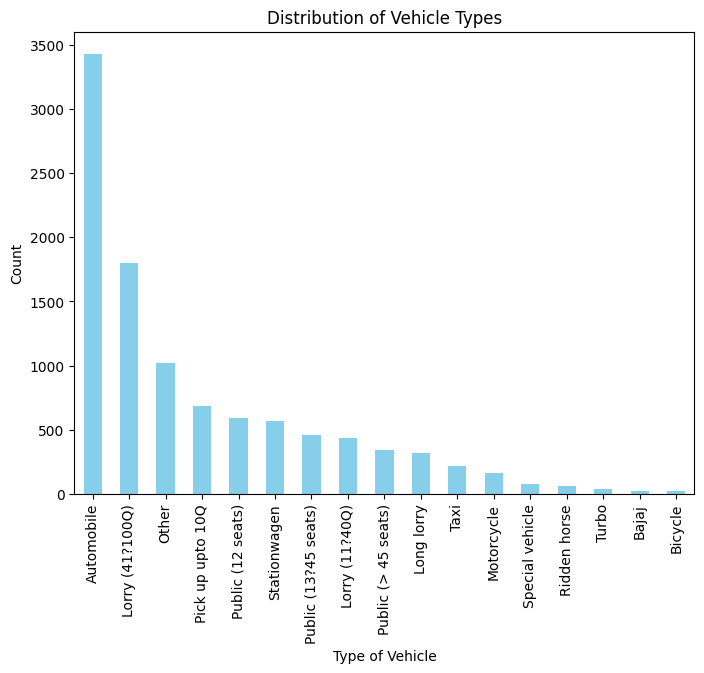

In [26]:
# It helps to understand if certain vehicle types are overrepresented in accidents,
# which could provide insights into the relationship between vehicle type and accident occurrence.
plt.figure(figsize=(8, 6))
data2['Type_of_vehicle'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

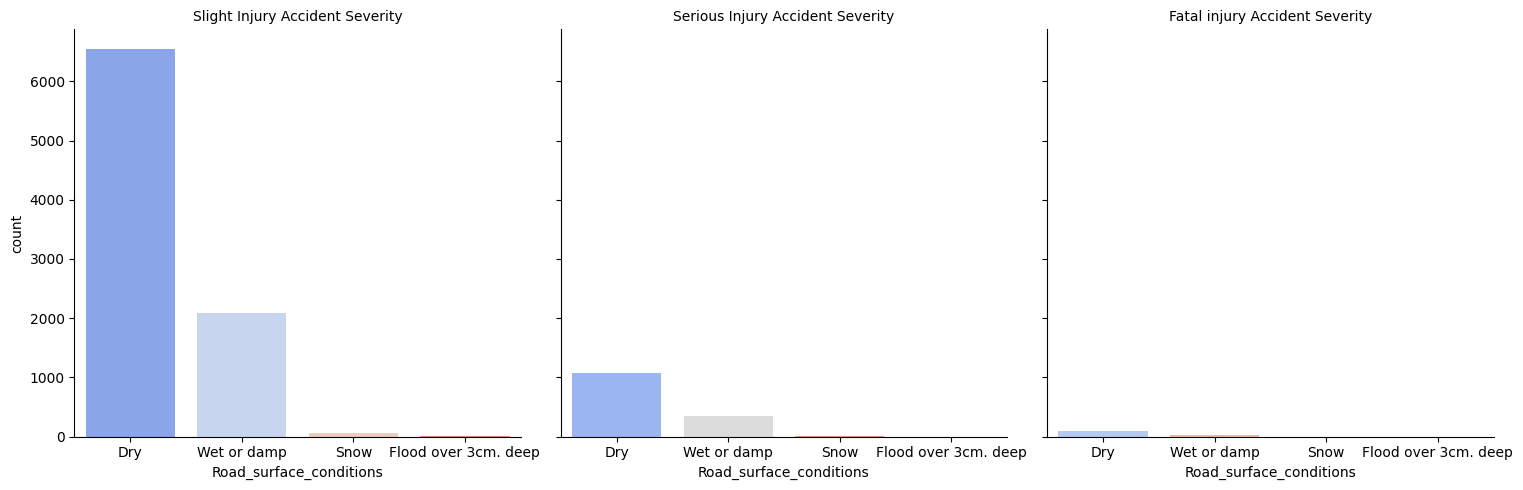

In [27]:
# The resulting grid will provide insights into how different road surface conditions affect accidents of varying severity.
g = sns.FacetGrid(data2, col="Accident_severity", height=5, col_wrap=4)
g.map(sns.countplot, 'Road_surface_conditions', palette='coolwarm')
g.set_titles("{col_name} Accident Severity")
plt.show()

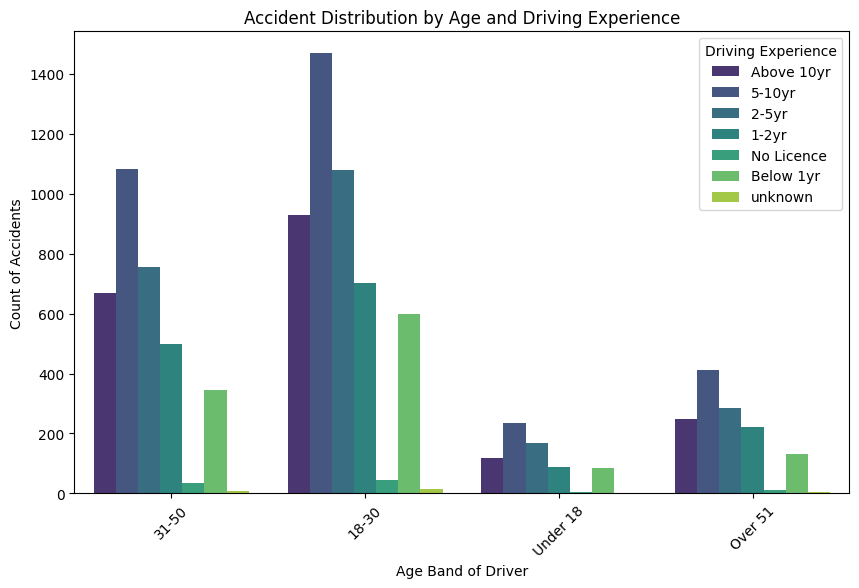

In [28]:
# It helps to explore how both age and driving experience interact to influence accident occurrence.
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Age_band_of_driver', hue='Driving_experience', palette='viridis')
plt.title('Accident Distribution by Age and Driving Experience')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Driving Experience')
plt.show()

<ipython-input-29-ee666ec9b53f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Hour'] = pd.to_datetime(data2['Time'], errors='coerce').dt.hour


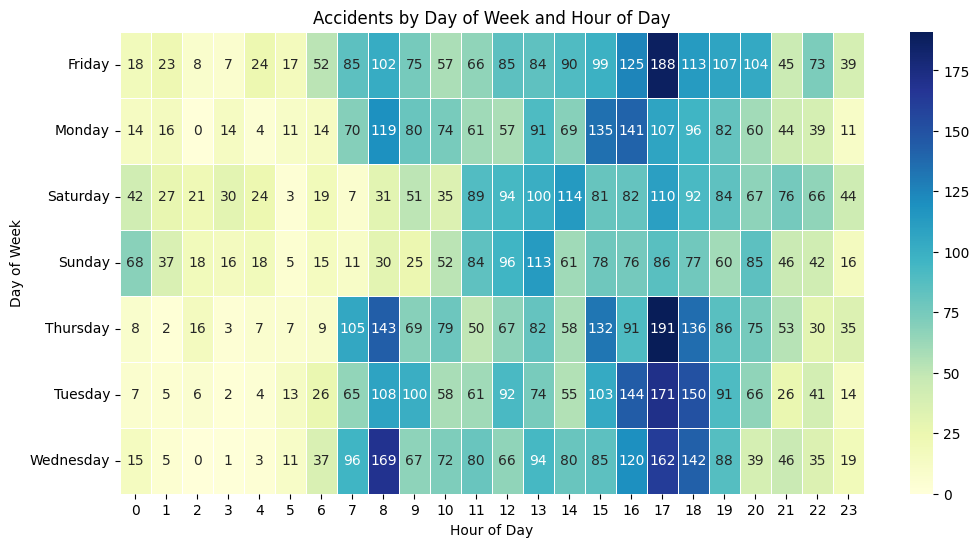

In [29]:
# The heatmap will help identify patterns in accident frequency, such as peak hours or specific days with higher accident rates
data2['Hour'] = pd.to_datetime(data2['Time'], errors='coerce').dt.hour
day_hour_counts = pd.crosstab(data2['Day_of_week'], data2['Hour'])
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Accidents by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

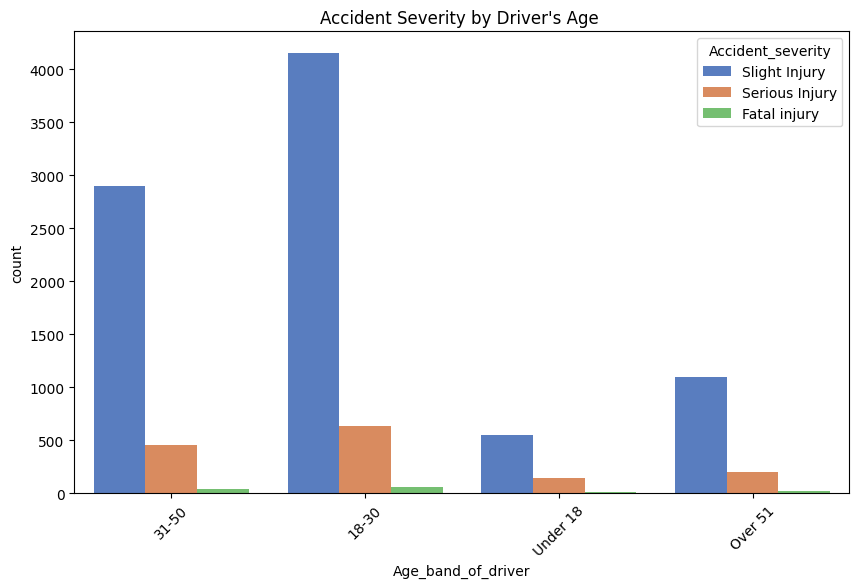

In [30]:
# It helps to analyze if certain age groups are more likely to be involved in severe accidents.
# Understanding age-related trends in accident severity can help target safety measures or awareness programs for high-risk age groups.
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Age_band_of_driver', hue='Accident_severity', palette='muted')
plt.title("Accident Severity by Driver's Age ")
plt.xticks(rotation=45)
plt.show()

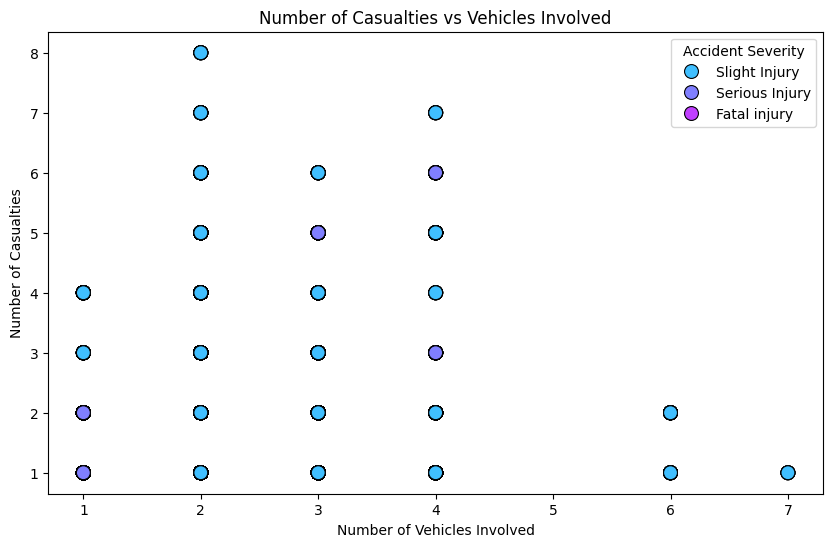

In [31]:
# This scatter plot helps to identify any patterns or correlations between the number of vehicles involved and the number of casualties,
# and how these relate to the severity of the accidents.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='Number_of_vehicles_involved', y='Number_of_casualties', hue='Accident_severity', palette='cool', s=100, edgecolor='black')
plt.title('Number of Casualties vs Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show()

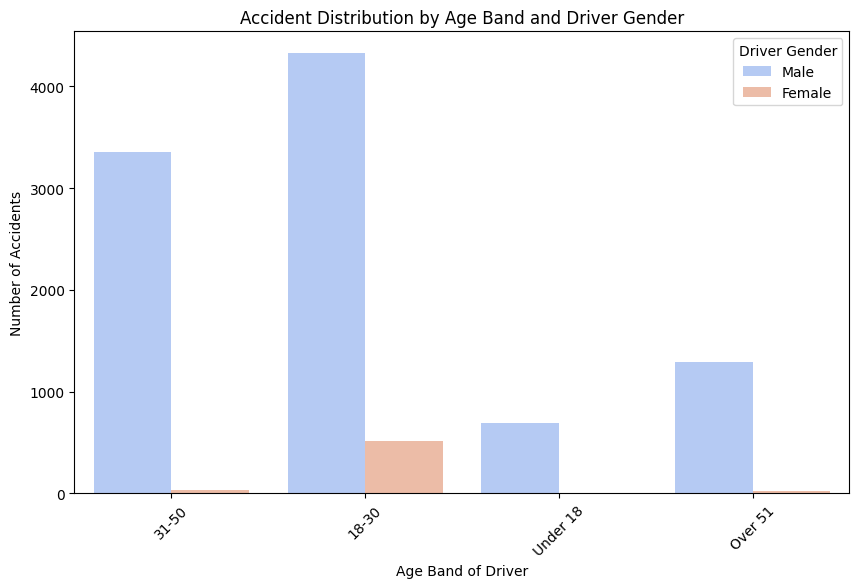

In [32]:
# It helps identify patterns where certain age groups and genders may be more prone to accidents.
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='Age_band_of_driver', hue='Sex_of_driver', palette='coolwarm')
plt.title('Accident Distribution by Age Band and Driver Gender')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.legend(title="Driver Gender")
plt.xticks(rotation=45)
plt.show()

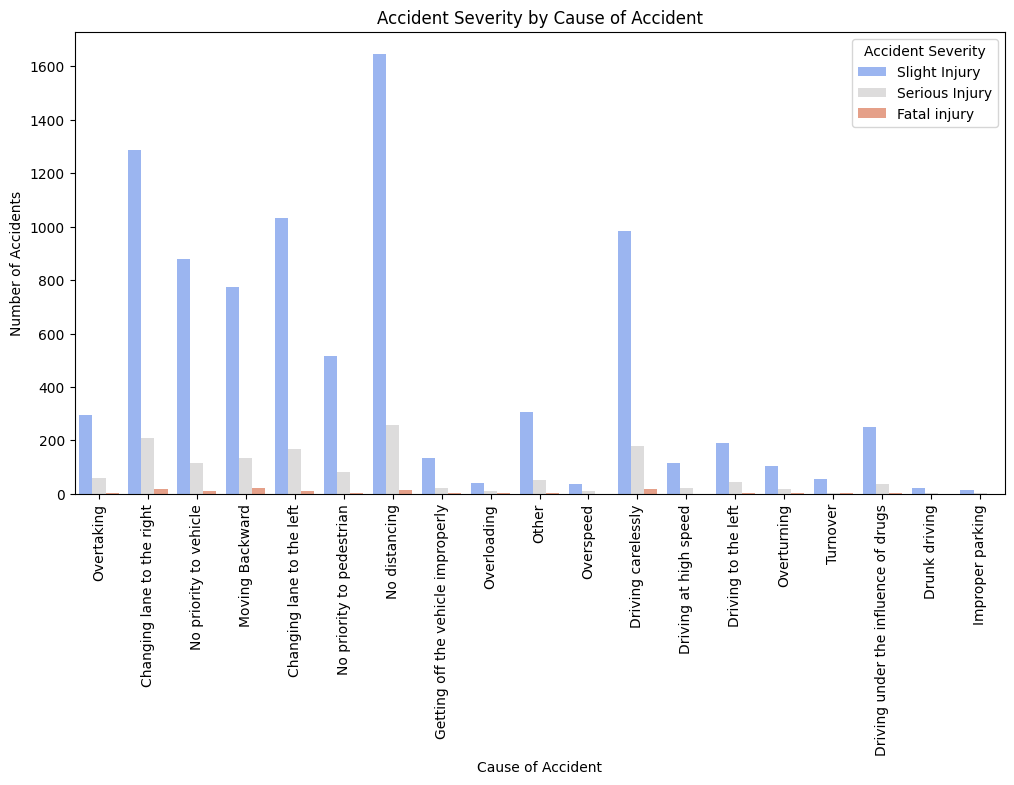

In [33]:
# This plot helps in understanding which causes of accidents are associated with different levels of severity.

plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Cause_of_accident', hue='Accident_severity', palette='coolwarm')
plt.title('Accident Severity by Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Accident Severity')
plt.show()

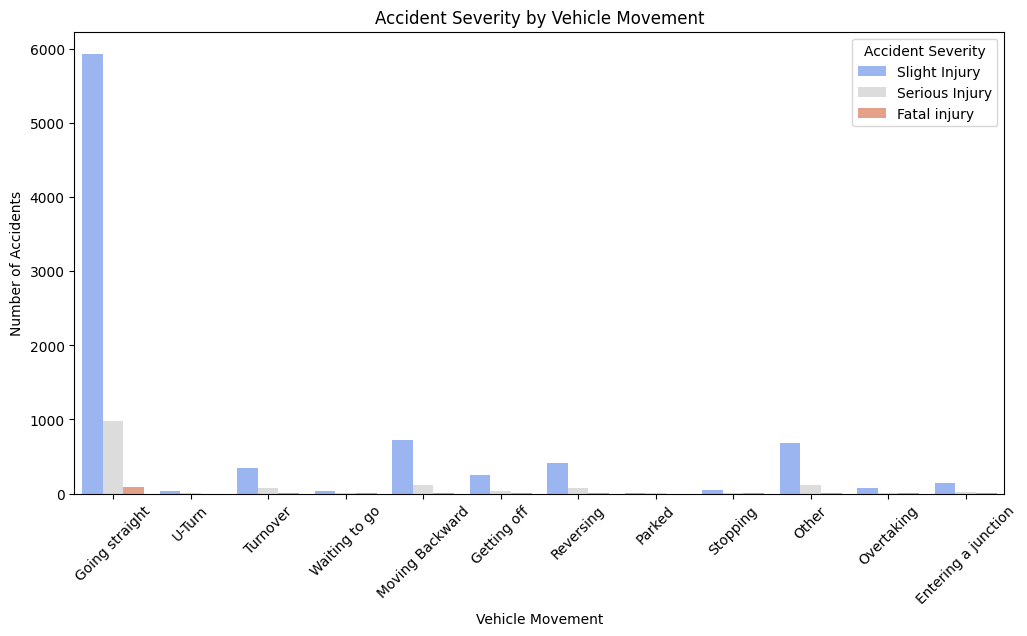

In [34]:
# This plot helps in analyzing how different types of vehicle movements are related to accident severity.
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Vehicle_movement', hue='Accident_severity', palette='coolwarm')
plt.title('Accident Severity by Vehicle Movement')
plt.xlabel('Vehicle Movement')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()